In [2]:
from models.llm_interface import LLMInterface
from src.experiments.experiment_runner import run_full_experiment_multi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
conversation_history = (
    "We've been discussing literary styles and historical contexts in literature."
)
candidate_classes = [
    " Mark Twain.",
    " Oscar Wilde.",
    " Charles Dickens.",
]
evidence_list = [
    " works that bring out the contemporary social conventions and mores of its time rather than"
    " focusing on poetic richness and dramatic performance."
]
class_elicitation = " My favourite author is"
evidence_elicitation = " I prefer reading"

In [3]:
llms = [
    LLMInterface(model_name="gpt2", backend="local"),
    LLMInterface(model_name="gpt2-medium", backend="local"),
    LLMInterface(model_name="gpt2-large", backend="local"),
    LLMInterface(model_name="gpt2-xl", backend="local"),
]

Using device: mps
Using device: mps
Using device: mps
Using device: mps


In [4]:
# All candidate classes should have the same number of tokens
[llms[0].tokenizer.tokenize(candidate_class) for candidate_class in candidate_classes]

[['ĠMark', 'ĠTwain', '.'],
 ['ĠOscar', 'ĠWilde', '.'],
 ['ĠCharles', 'ĠDickens', '.']]

In [5]:
experiment_results = [
    run_full_experiment_multi(
        conversation_history,
        candidate_classes,
        evidence_list,
        class_elicitation,
        evidence_elicitation,
        llm,
        log_details=True
    ) for llm in llms
]


--- Results for Pair:  Mark Twain. vs.  Oscar Wilde. ---
Prior probability for  Mark Twain.: 5.0856e-04
Prior probability for  Oscar Wilde.: 1.5956e-04
Prior ratio: 3.1873e+00
Likelihood for  Mark Twain.: 2.0254e-43
Likelihood for  Oscar Wilde.: 4.7169e-43
Likelihood ratio: 4.2939e-01
Posterior probability for  Mark Twain.: 3.0236e-04
Posterior probability for  Oscar Wilde.: 1.1563e-04
Posterior ratio: 2.6150e+00
Bayesian Consistency Error (BCE): 6.4745e-01

--- Results for Pair:  Mark Twain. vs.  Charles Dickens. ---
Prior probability for  Mark Twain.: 5.0856e-04
Prior probability for  Charles Dickens.: 1.3667e-03
Prior ratio: 3.7211e-01
Likelihood for  Mark Twain.: 2.0254e-43
Likelihood for  Charles Dickens.: 1.5200e-43
Likelihood ratio: 1.3325e+00
Posterior probability for  Mark Twain.: 3.0236e-04
Posterior probability for  Charles Dickens.: 7.0640e-04
Posterior ratio: 4.2804e-01
Bayesian Consistency Error (BCE): 1.4707e-01

--- Results for Pair:  Oscar Wilde. vs.  Charles Dickens.

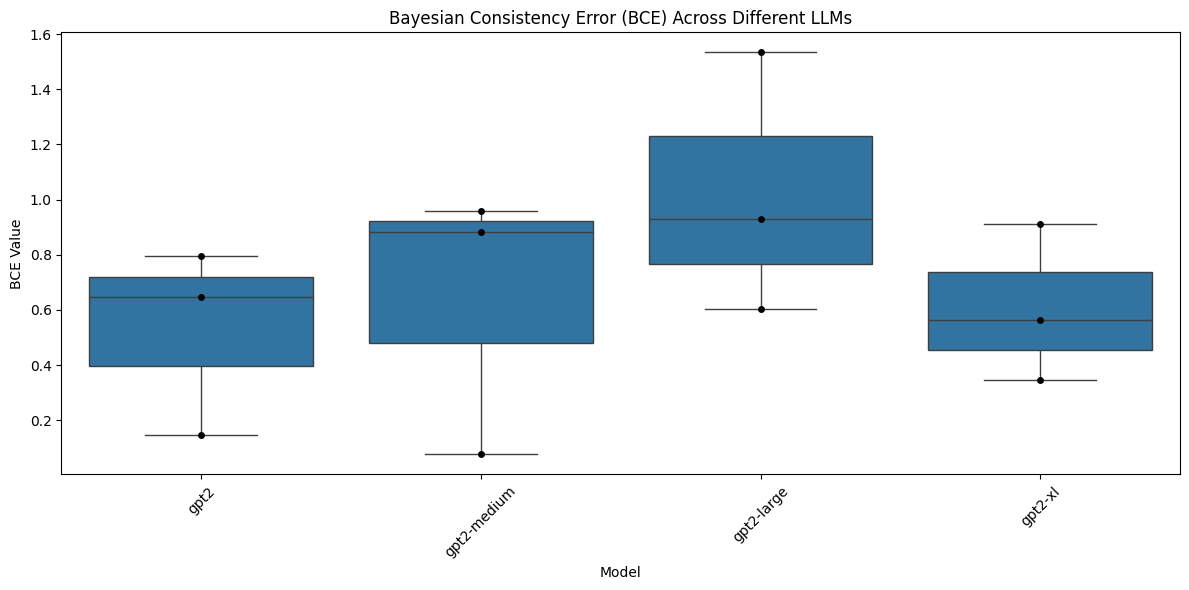


Summary Statistics:
                 mean       std       min       max
model                                              
gpt2         0.529681  0.339410  0.147073  0.794522
gpt2-large   1.022454  0.471435  0.604864  1.533682
gpt2-medium  0.640140  0.489601  0.076527  0.960210
gpt2-xl      0.607142  0.284094  0.347685  0.910713


In [7]:
all_results = []
for i, model_result in enumerate(experiment_results):
    model_name = llms[i].model_name  # Get the model name from the llms list
    
    # model_result is a dictionary where each key is a tuple (class1, class2, evidence)
    # and each value is a dictionary of metrics
    for pair_tuple, metrics in model_result.items():
        all_results.append({
            "model": model_name,
            "pair": f"{pair_tuple[0]} vs {pair_tuple[1]}",
            "evidence": pair_tuple[2],
            "BCE": metrics["BCE"]
        })

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(all_results)

plt.figure(figsize=(12, 6))
sns.boxplot(x="model", y="BCE", data=results_df)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)

# Add individual points for better visibility
sns.stripplot(x="model", y="BCE", data=results_df, color="black", alpha=1, jitter=False)

plt.tight_layout()
# plt.savefig("bce_comparison_boxplot.png")
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
summary = results_df.groupby("model")["BCE"].agg(["mean", "std", "min", "max"])
print(summary)

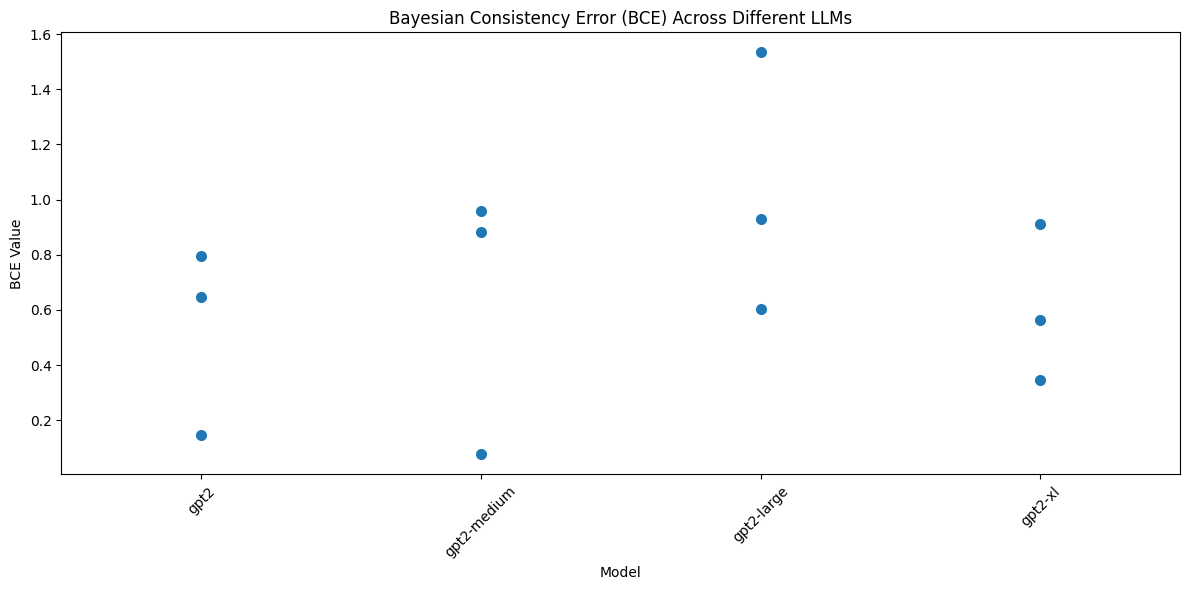

In [8]:
# Create swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="model", y="BCE", data=results_df, size=8)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("bce_comparison_swarmplot.png")
plt.show()